# Project: Data Science Blog Post (VideoGame sales)

### Introduction
    In this project I am going through dataset of video game sales around the globe from a period of 1988 to 2020.
    Though this data is not complete.
    Before making any conclusions I did remove Nan values with respect to year column.
    
    This project follows CRISP-DM methodology to provide solution to this datascience problem:

#### 1. Business  Understanding:

    1.Best selling platform
    2.Publisher who made the highest sales
    3.Top 10/15 publishers who made the highest sales
    4.What was the genre which was most popular
    5.Best year of sales
    6.Game title with maximum platforms distribution

#### Libraries and data import

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import seaborn as sns
%matplotlib inline

df = pd.read_csv('./vgsales-12-4-2019.csv')
df.head()

,Rank,Name,basename,Genre,ESRB_Rating,Platform,Publisher,Developer,VGChartz_Score,Critic_Score,...,NA_Sales,PAL_Sales,JP_Sales,Other_Sales,Year,Last_Update,url,status,Vgchartzscore,img_url
0,1,Wii Sports,wii-sports,Sports,E,Wii,Nintendo,Nintendo EAD,NaN,7.7,...,NaN,NaN,NaN,NaN,2006.0,NaN,http://www.vgchartz.com/game/2667/wii-sports/?...,1,NaN,/games/boxart/full_2258645AmericaFrontccc.jpg
1,2,Super Mario Bros.,super-mario-bros,Platform,NaN,NES,Nintendo,Nintendo EAD,NaN,10.0,...,NaN,NaN,NaN,NaN,1985.0,NaN,http://www.vgchartz.com/game/6455/super-mario-...,1,NaN,/games/boxart/8972270ccc.jpg
2,3,Mario Kart Wii,mario-kart-wii,Racing,E,Wii,Nintendo,Nintendo EAD,NaN,8.2,...,NaN,NaN,NaN,NaN,2008.0,11th Apr 18,http://www.vgchartz.com/game/6968/mario-kart-w...,1,8.7,/games/boxart/full_8932480AmericaFrontccc.jpg
3,4,PlayerUnknown's Battlegrounds,playerunknowns-battlegrounds,Shooter,NaN,PC,PUBG Corporation,PUBG Corporation,NaN,NaN,...,NaN,NaN,NaN,NaN,2017.0,13th Nov 18,http://www.vgchartz.com/game/215988/playerunkn...,1,NaN,/games/boxart/full_8052843AmericaFrontccc.jpg
4,5,Wii Sports Resort,wii-sports-resort,Sports,E,Wii,Nintendo,Nintendo EAD,NaN,8.0,...,NaN,NaN,NaN,NaN,2009.0,NaN,http://www.vgchartz.com/game/24656/wii-sports-...,1,8.8,/games/boxart/full_7295041AmericaFrontccc.jpg


#### 2. Data Understanding and Analysis

In [2]:
# How many rows and columns does our data have
df.shape

(55792, 23)

In [3]:
# What is the data type of each column
df.dtypes

Rank                int64
Name               object
basename           object
Genre              object
ESRB_Rating        object
Platform           object
Publisher          object
Developer          object
VGChartz_Score    float64
Critic_Score      float64
User_Score        float64
Total_Shipped     float64
Global_Sales      float64
NA_Sales          float64
PAL_Sales         float64
JP_Sales          float64
Other_Sales       float64
Year              float64
Last_Update        object
url                object
status              int64
Vgchartzscore     float64
img_url            object
dtype: object

In [4]:
# How does our data look like.
df.describe()

,Rank,VGChartz_Score,Critic_Score,User_Score,Total_Shipped,Global_Sales,NA_Sales,PAL_Sales,JP_Sales,Other_Sales,Year,status,Vgchartzscore
count,55792.000000,0.0,6536.000000,335.000000,1827.000000,19415.000000,12964.000000,13189.000000,7043.000000,15522.000000,54813.000000,55792.0,799.000000
mean,27896.500000,NaN,7.213709,8.253433,1.887258,0.365503,0.275541,0.155263,0.110402,0.044719,2005.659095,1.0,7.425907
std,16105.907446,NaN,1.454079,1.401489,4.195693,0.833022,0.512809,0.399257,0.184673,0.129554,8.355585,0.0,1.384226
min,1.000000,NaN,1.000000,2.000000,0.030000,0.000000,0.000000,0.000000,0.000000,0.000000,1970.000000,1.0,2.600000
25%,13948.750000,NaN,6.400000,7.800000,0.200000,0.030000,0.050000,0.010000,0.020000,0.000000,2000.000000,1.0,6.800000
50%,27896.500000,NaN,7.500000,8.500000,0.590000,0.120000,0.120000,0.040000,0.050000,0.010000,2008.000000,1.0,7.800000
75%,41844.250000,NaN,8.300000,9.100000,1.800000,0.360000,0.290000,0.140000,0.120000,0.040000,2011.000000,1.0,8.500000
max,55792.000000,NaN,10.000000,10.000000,82.860000,20.320000,9.760000,9.850000,2.690000,3.120000,2020.000000,1.0,9.600000


We can see there are a lot of records with null values. 
First will remove nan values from year column so that we can know which game was shipped which year.

#### 3. Prepare Data
In this step we clean our data before exploring the dataset:
    In our case we need to clean the data based on year column to make conclusions on sales
    
Note:    Also in few cases I am dropping nan values at the time of its actually required so that other data analysis is not impacted

In [5]:
# Removing nan values based on year column to clean our data.
df.dropna(subset=['Year'], axis =0, inplace=True)
df.describe()

,Rank,VGChartz_Score,Critic_Score,User_Score,Total_Shipped,Global_Sales,NA_Sales,PAL_Sales,JP_Sales,Other_Sales,Year,status,Vgchartzscore
count,54813.000000,0.0,6532.000000,328.000000,1827.000000,19377.000000,12958.000000,13165.000000,7035.000000,15496.000000,54813.000000,54813.0,756.000000
mean,27507.718735,NaN,7.214590,8.272256,1.887258,0.366213,0.275669,0.155540,0.110522,0.044793,2005.659095,1.0,7.488492
std,15923.622496,NaN,1.453208,1.392177,4.195693,0.833683,0.512893,0.399567,0.184743,0.129650,8.355585,0.0,1.375553
min,1.000000,NaN,1.000000,2.000000,0.030000,0.000000,0.000000,0.000000,0.000000,0.000000,1970.000000,1.0,2.600000
25%,13704.000000,NaN,6.400000,7.800000,0.200000,0.030000,0.050000,0.010000,0.020000,0.000000,2000.000000,1.0,6.900000
50%,27492.000000,NaN,7.500000,8.500000,0.590000,0.120000,0.120000,0.040000,0.050000,0.010000,2008.000000,1.0,7.900000
75%,41232.000000,NaN,8.300000,9.200000,1.800000,0.360000,0.290000,0.140000,0.120000,0.040000,2011.000000,1.0,8.500000
max,55791.000000,NaN,10.000000,10.000000,82.860000,20.320000,9.760000,9.850000,2.690000,3.120000,2020.000000,1.0,9.600000


 Now that we dont have any null values in year column let us see how our sales chart looks through the years

#### 4. Data Modeling & Evaluation

##### Answer for question - Best selling platform ?

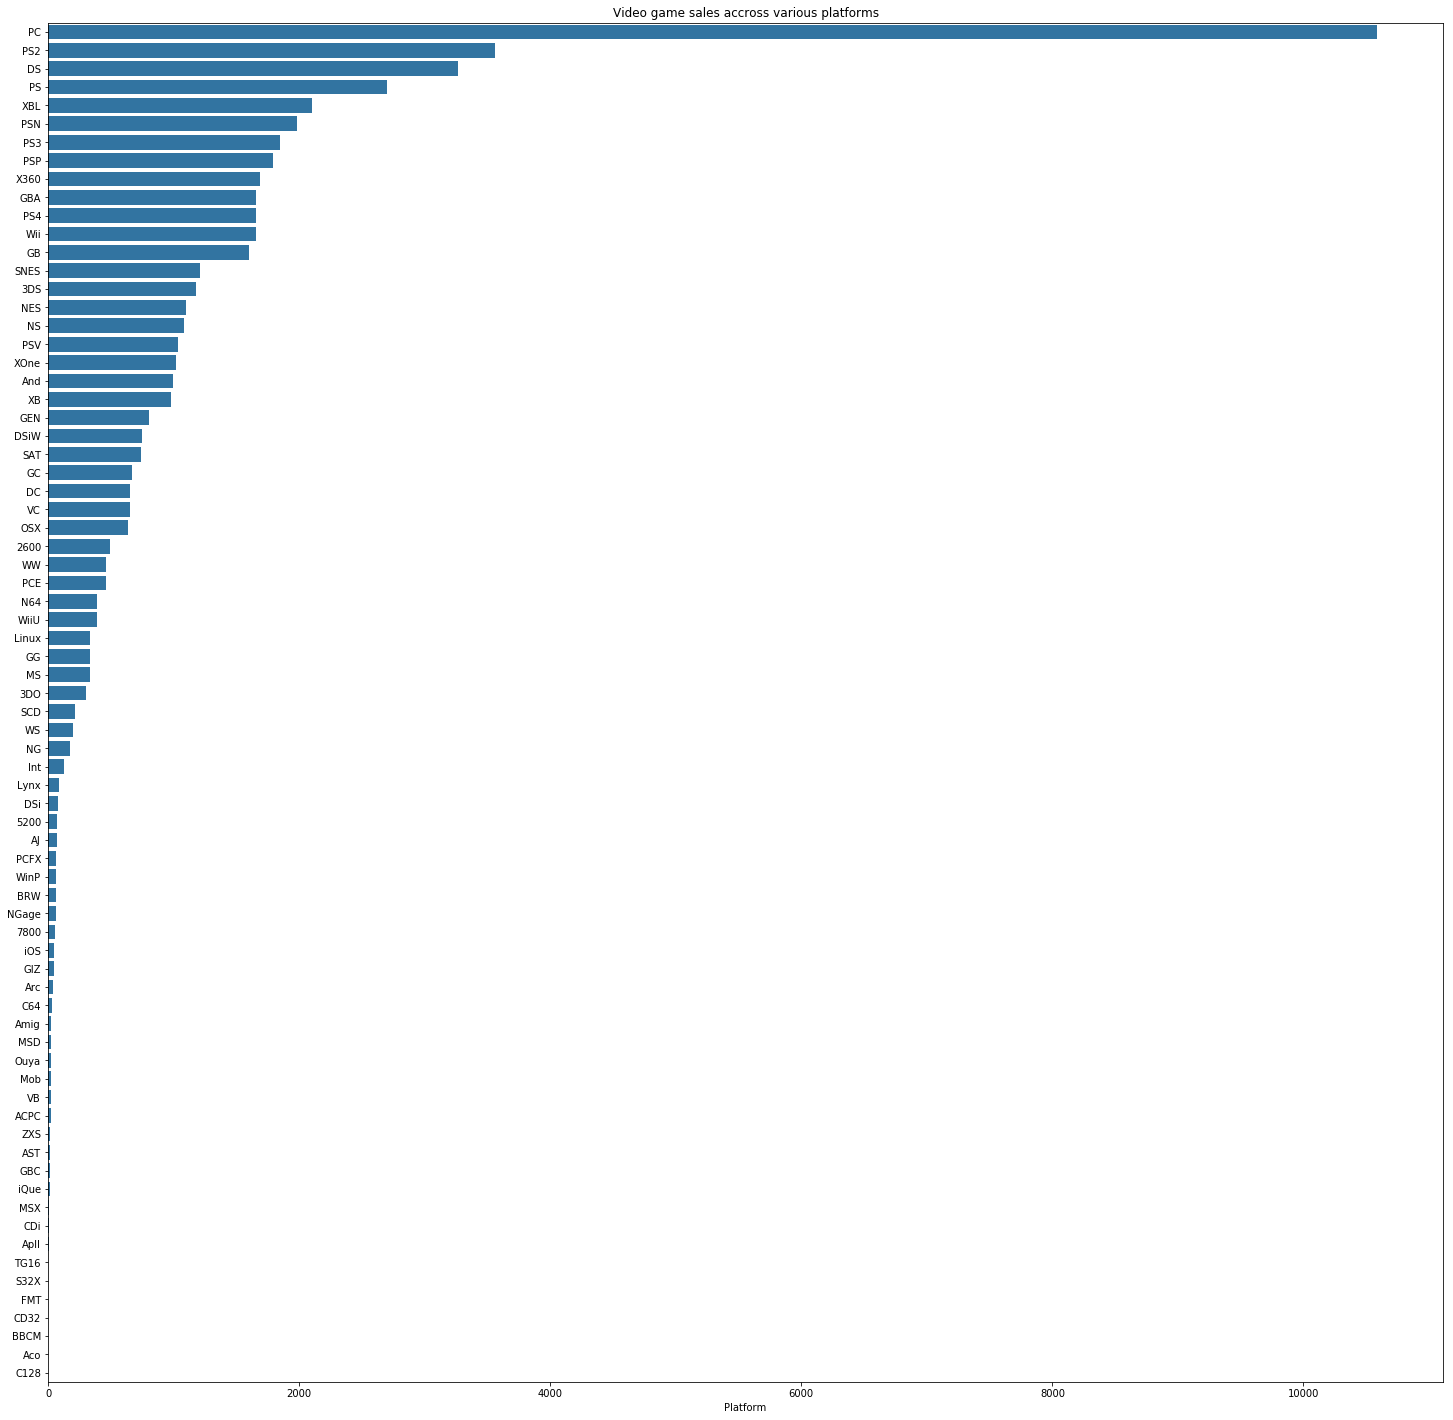

In [6]:
# Sales according to the platform
platforms = df.Platform.value_counts();
base_color = sns.color_palette()[0];
plt.subplots(figsize=(25,25));
chart = sns.barplot(x=platforms , y=platforms.index, color = base_color);
chart.set_title("Video game sales accross various platforms");

##### Answer for Question - Game title with maximum platforms distribution

In [7]:
# games distribution titles with most spread across platforms
titles = df.groupby('Name').agg({'Name':lambda x : len(x) if (len(x) > 1) else None})
titles = titles.dropna()
titles.Name = titles.Name
titles.columns = ['Platform_count']
titles.sort_values(by='Platform_count', ascending=False)

,Platform_count
Name,
Plants vs. Zombies,20.0
Monopoly,15.0
Double Dragon,14.0
Wheel of Fortune,12.0
Elite,12.0
Space Invaders,12.0
Jeopardy!,12.0
Pier Solar and the Great Architects,12.0
Lemmings,12.0


### Group all games according to genre

##### Answer for Question - What was the genre which was most popular?

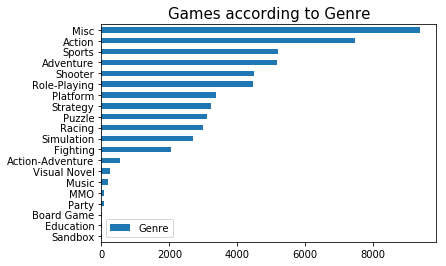

In [8]:
# list games according to sales per genre
genre = df.groupby('Genre').agg({'Genre':len})
genre.index.name = None
genre = genre.sort_values(by='Genre')
ax = genre.plot(kind='barh');
ax.set_title('Games according to Genre', size=15, alpha=1);

Text(0, 0.5, 'Global Sales')

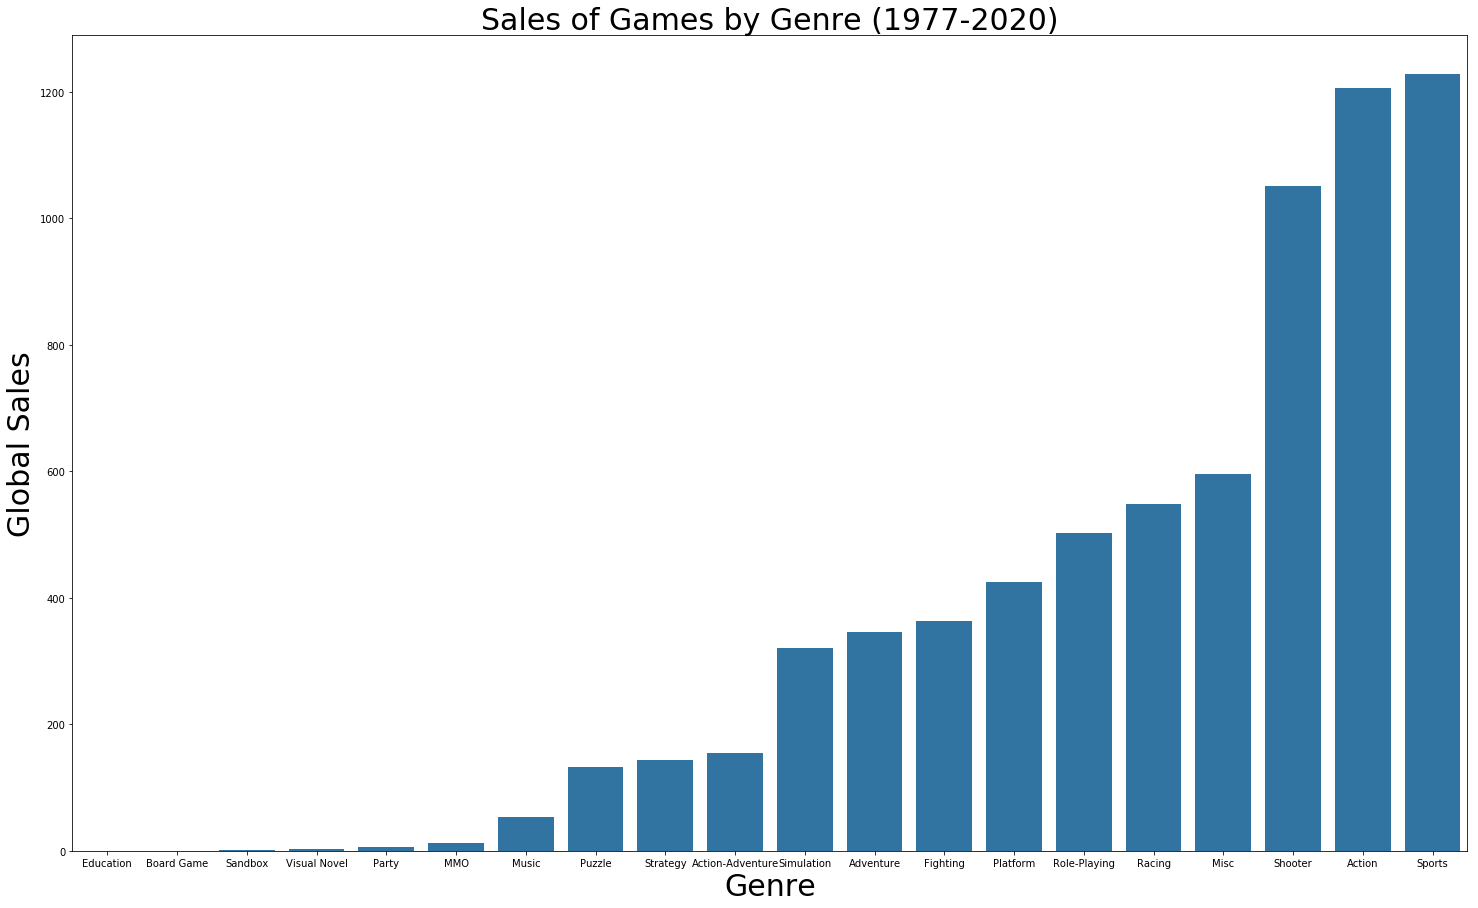

In [9]:
sales_by_genre = df.groupby('Genre').agg({'Global_Sales':np.sum}).sort_values('Global_Sales')
plt.subplots(figsize=(25,15))
ax = sns.barplot(x=sales_by_genre.index, y=sales_by_genre.Global_Sales, color = base_color)
ax.set_title('Sales of Games by Genre (1977-2020)', size=30, alpha=1)
ax.set_xlabel('Genre', size=30, alpha=1)
ax.set_ylabel('Global Sales', size=30, alpha=1)

### Games by Publishers

##### Answer for Questions - 
    2.Publisher who made the highest sales?
    3.Top 10/15 publishers who made the highest sales?

In [10]:
df_publisher = df.pivot_table(index=['Publisher'], values=['Global_Sales','NA_Sales','PAL_Sales','JP_Sales'], 
                                               aggfunc=np.sum).sort_values(['Global_Sales'], ascending=False)
df_publisher = df_publisher[['Global_Sales','NA_Sales','PAL_Sales','JP_Sales']]
df_top15Publisher = df_publisher.iloc[0:15,:]
df_top15Publisher.head(15)


,Global_Sales,NA_Sales,PAL_Sales,JP_Sales
Publisher,,,,
Activision,727.65,428.29,214.08,7.51
Electronic Arts,658.12,328.99,243.68,8.82
EA Sports,497.62,276.25,159.21,3.36
Ubisoft,477.94,247.65,171.42,6.66
Sony Computer Entertainment,428.92,194.04,131.15,47.70
THQ,338.99,208.21,95.60,2.90
Konami,250.20,81.30,59.00,82.66
Rockstar Games,240.61,115.44,89.90,4.71
Sega,209.15,85.50,61.77,42.87


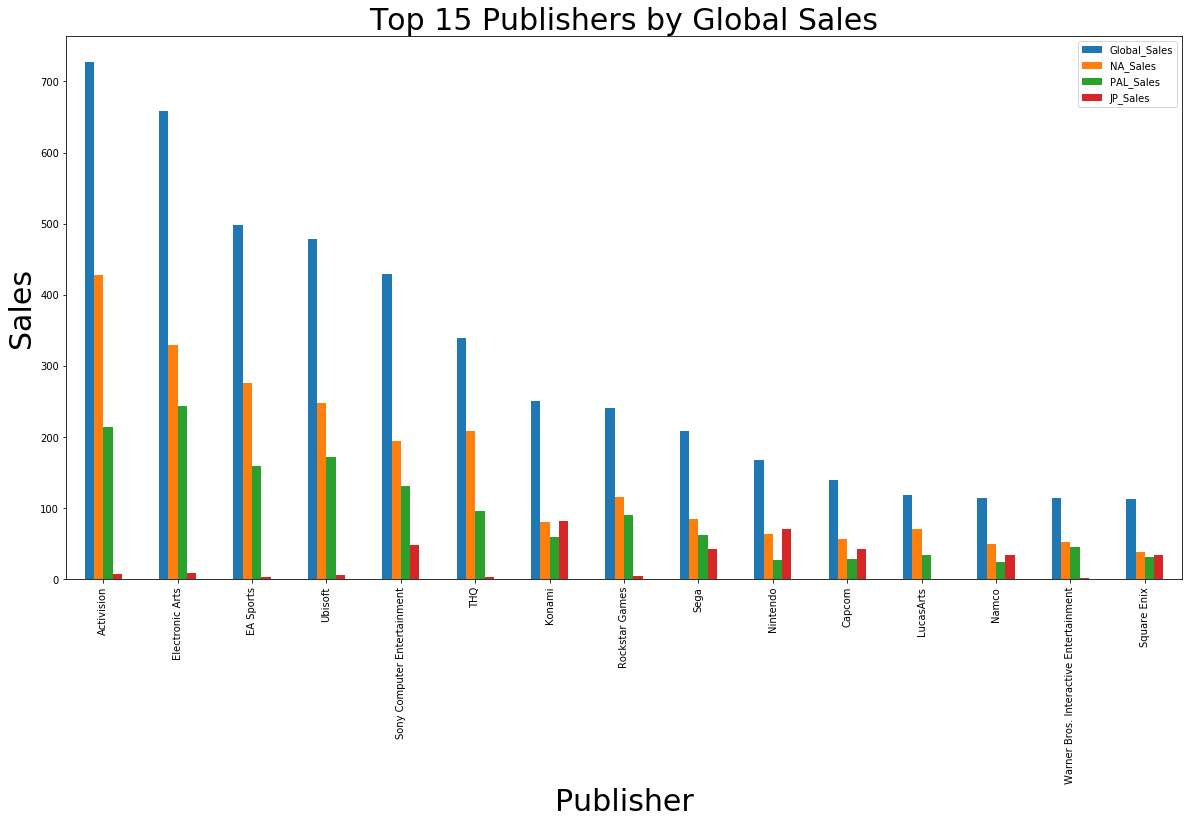

In [11]:
# Plot the data frame
ax = df_top15Publisher.plot(kind='bar', grid=False,figsize=(20,10));
ax.set_title('Top 15 Publishers by Global Sales', size=30);
ax.set_xlabel('Publisher', size=30);
ax.set_ylabel('Sales', size=30);

### Example case of Activision most sold publisher of game titles

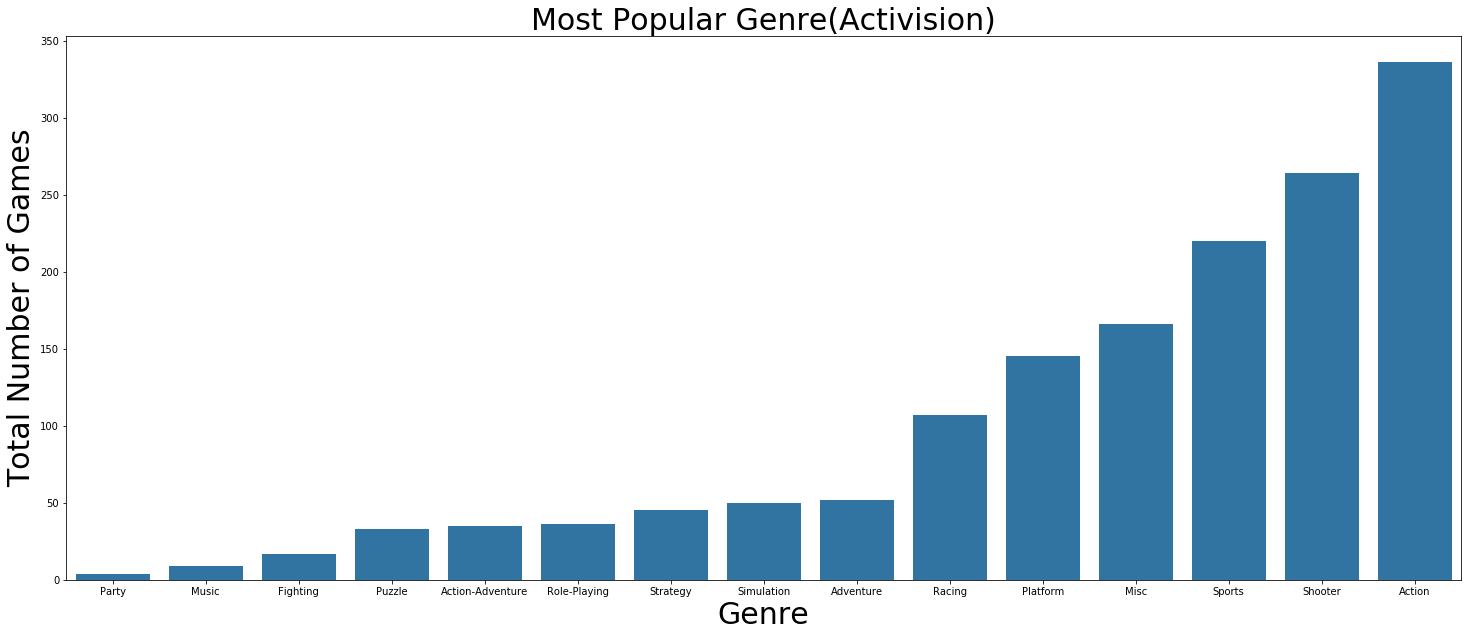

In [12]:
df_Publisher_Activision = df.loc[df.Publisher=="Activision"].sort_values(['Year']).groupby('Genre').agg({'Genre':len})
df_Publisher_Activision.index.name = None
df_Publisher_Activision = df_Publisher_Activision.sort_values(by='Genre')

plt.subplots(figsize=(25,10))
ax = sns.barplot(x=df_Publisher_Activision.index, y=df_Publisher_Activision.Genre, color = base_color)
ax.set_title('Most Popular Genre(Activision)', size=30)
ax.set_xlabel('Genre', size=30)
ax.set_ylabel('Total Number of Games', size=30);

### Example case of Electronic Arts second most sold publisher of game titles

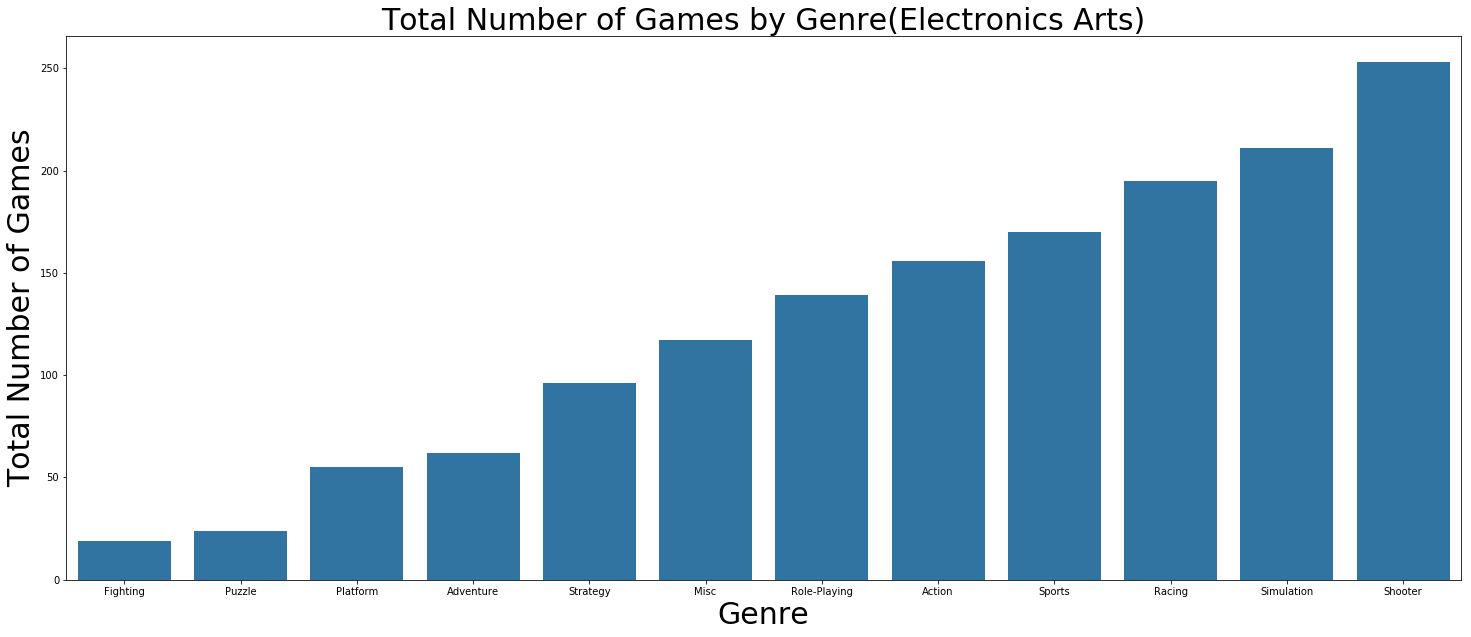

In [13]:
df_Publisher_EA = df.loc[df.Publisher=="Electronic Arts"].sort_values(['Year']).groupby('Genre').agg({'Genre':len})
df_Publisher_EA.index.name = None
df_Publisher_EA = df_Publisher_EA.sort_values(by='Genre')

plt.subplots(figsize=(25,10))
ax = sns.barplot(x=df_Publisher_EA.index, y=df_Publisher_EA.Genre, color = base_color)
ax.set_title('Total Number of Games by Genre(Electronics Arts)', size=30)
ax.set_xlabel('Genre', size=30)
ax.set_ylabel('Total Number of Games', size=30);

### Titles per year

##### Answer for question - Best year of sales?

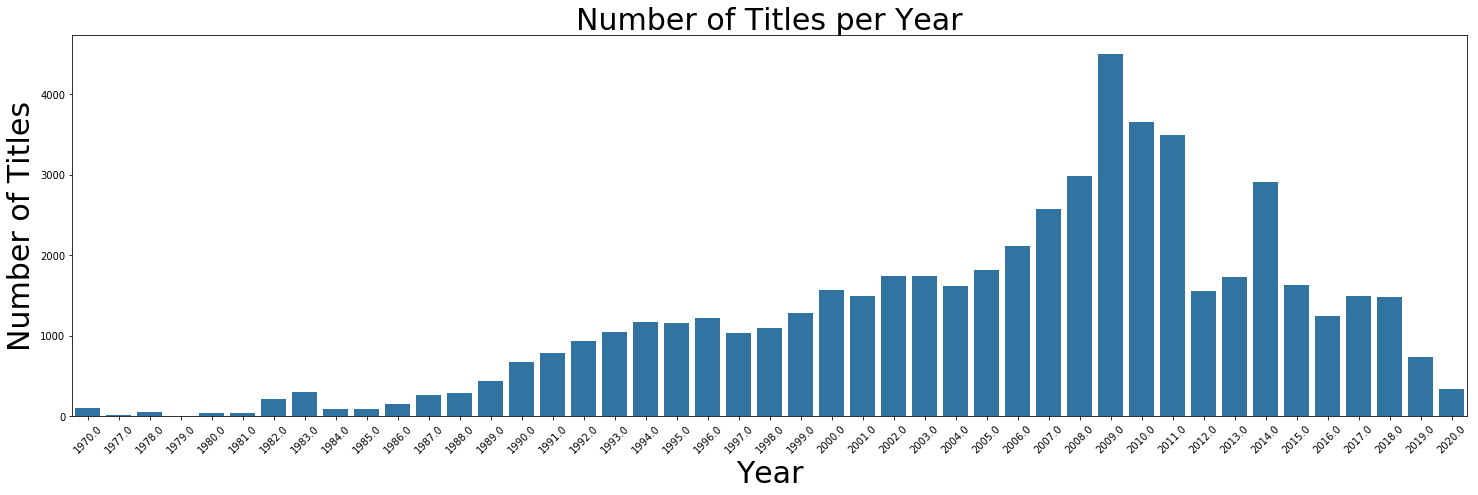

In [14]:
df_year = df.groupby(['Year']).agg({'Name':lambda x : len(x) if (len(x) > 1) else None}).dropna()
plt.subplots(figsize=(25,7))
ax = sns.barplot(x=df_year.index, y=df_year.Name, color=base_color)
g = ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
ax.set_title('Number of Titles per Year', size=30)
ax.set_xlabel('Year', size=30)
ax.set_ylabel('Number of Titles', size=30);

#### Conclusion
From above data evaluation we answered our business question as below:  

**1.Best selling platform?**  
    
    PC platform was the most popular platform.  
    
   
**2.Publisher who made the highest sales?**  
    
    Activision sold the most number of games. 
    

**3.Top 10/15 publishers who made the highest sales?**  
       
    Activision   
    Electronic Arts   
    EA Sports   
    Ubisoft   
    Sony Computer Entertainment   
    THQ   
    Konami   
    Rockstar Games   
    Sega   
    Nintendo   
    Capcom   
    LucasArts   
    Namco   
    Warner Bros. Interactive Entertainment   
    Square Enix   
    

**4.What was the genre which was most popular?**  
    
    Sports genre was the most popular genre followed by Action and shooter.  


**5.Best year of sales?**  
    
    2009 seems to be the best year of sales followed by 2010 and 2011.  


**6.Game title with maximum platforms distribution?**  
    
    Plants vs. Zombies title was released across 20 platforms.  

